In [1]:
import os, sys
project_dir = os.path.join(os.getcwd(),'../..')
if project_dir not in sys.path:
    sys.path.append(project_dir)

hyspeclab_dir = os.path.join(project_dir, 'HySpecLab')
if hyspeclab_dir not in sys.path:
    sys.path.append(hyspeclab_dir)

import numpy as np
import config

In [2]:
from dataset import DermaDataset

train_dir = ['train', 'validation']
dataset_dir = list(map(lambda x: os.path.join(config.DERMA_DATASET_DIR, x), train_dir))

dataset = DermaDataset(dataset_dir)
X, y = dataset.get(dataframe=True)

In [8]:
from sklearn.linear_model import LogisticRegression

C = 5e-1
log_l1 = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")

In [9]:
log_l1.fit(X, y)
print('Score: {}'.format(log_l1.score(X, y)))

/home/abian/Workspace/Anaconda/envs/HySpecLab/lib/python3.9/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Score: 0.8237450648618161


In [10]:
coef_l1_LR = log_l1.coef_.ravel()
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100

In [11]:
sparsity_l1_LR

6.896551724137931

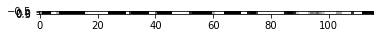

In [12]:
from matplotlib import pyplot as plt
plt.imshow(
        np.abs(coef_l1_LR.reshape(1, 116)),
        interpolation="nearest",
        cmap="binary",
        vmax=1,
        vmin=0,
)

In [13]:
coef_l1_LR

array([-3.94440576e-01, -6.43754497e+00, -3.67481722e+00, -1.92561287e+00,
       -6.37122151e-02, -5.73911357e-07,  3.15946529e-01,  1.07821438e+00,
        1.78560751e+00,  4.77171371e+00,  5.45287236e+00,  5.71387901e+00,
        5.25428432e+00,  3.83425008e+00,  2.25634096e+00,  1.10913840e+00,
        6.53442990e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.37776030e-07,  2.23102761e-06,  0.00000000e+00,  0.00000000e+00,
       -1.96528265e+00, -4.38355920e+00, -6.38347691e+00, -6.46844492e+00,
       -5.04882787e+00, -1.61219954e+00,  0.00000000e+00,  7.55320696e-01,
        4.25865800e+00,  5.63473010e+00,  5.76720153e+00,  5.19847893e+00,
        3.69174616e+00,  1.63003567e+00,  1.49385198e-05,  1.14866964e-05,
       -5.98940310e-01, -2.54169756e+00, -3.79883705e+00, -4.07321646e+00,
       -2.37272332e+00, -9.98361621e-01, -2.61632228e-05,  0.00000000e+00,
        0.00000000e+00, -7.01376841e-06, -3.18490629e-05, -4.04544557e-02,
       -8.04338018e-01, -